# ML Final Project

Zongdi Qiu (zq9ms)

Qinglin Li(xep4ez)

Zekui Fu(pry7cp)

Jinshuo Xiao(zmy4fg) 

# Import Packages

In [370]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import keras
import matplotlib.pyplot as plt
import nltk
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import missingno
import seaborn as sns

# Read Data

In [380]:
train_data = pd.read_csv('fake_job_postings.csv')

In [381]:
train_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [382]:
train_data.shape

(17880, 18)

In [396]:
df=train_data[['title','description','requirements','company_profile','employment_type','required_experience','fraudulent']]
df.head()

,title,description,requirements,company_profile,employment_type,required_experience,fraudulent
0,Marketing Intern,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,"We're Food52, and we've created a groundbreaki...",Other,Internship,0
1,Customer Service - Cloud Video Production,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,"90 Seconds, the worlds Cloud Video Production ...",Full-time,Not Applicable,0
2,Commissioning Machinery Assistant (CMA),"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Valor Services provides Workforce Solutions th...,NaN,NaN,0
3,Account Executive - Washington DC,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our passion for improving quality of life thro...,Full-time,Mid-Senior level,0
4,Bill Review Manager,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,SpotSource Solutions LLC is a Global Human Cap...,Full-time,Mid-Senior level,0


# EDA

In [384]:
print(df.fraudulent.value_counts())

0    17014
1      866
Name: fraudulent, dtype: int64


<AxesSubplot:>

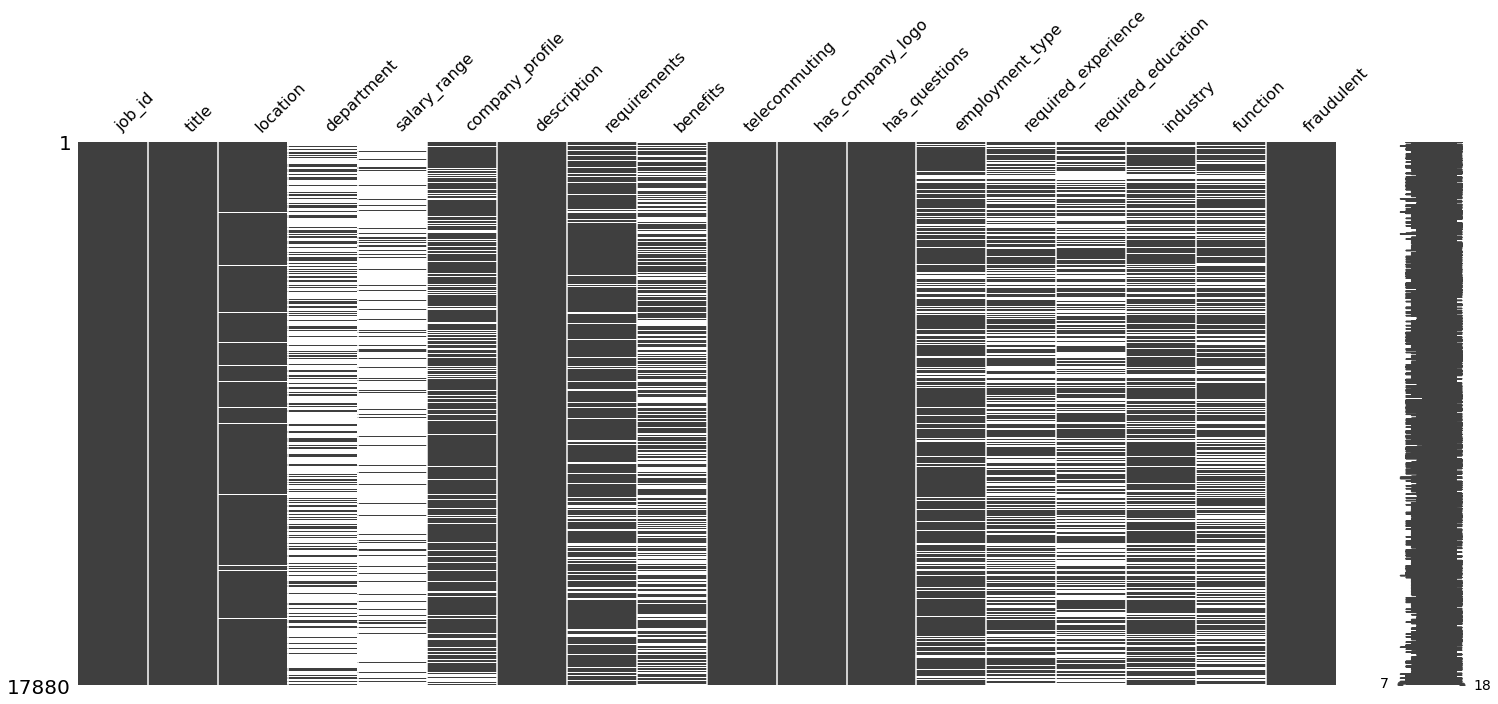

In [385]:
missingno.matrix(train_data)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraudulent', ylabel='count'>

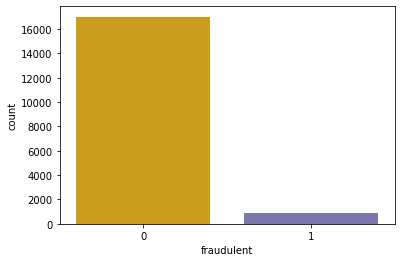

In [387]:
frad_dict=dict(train_data.fraudulent.value_counts())
sns.countplot(train_data.fraudulent,palette='Dark2_r')

In [388]:
#frequency of each jobs.
print(train_data.title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


Text(0.5, 1.0, 'employment type vs fake')

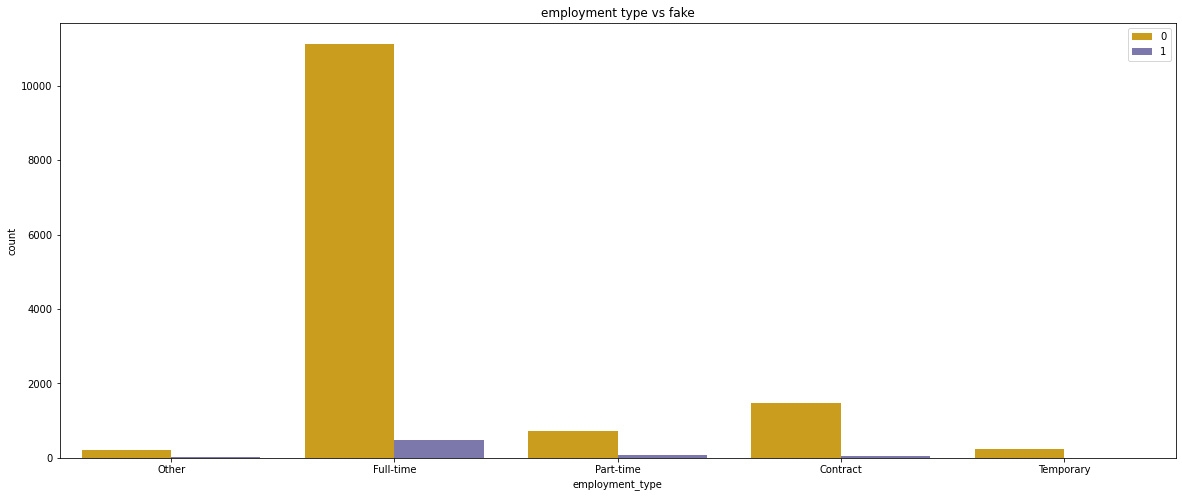

In [389]:
plt.figure(1,figsize=(20,8))
sns.countplot(hue=train_data.fraudulent,x=train_data.employment_type,palette='Dark2_r')
plt.legend(loc='upper right')
plt.title('employment type vs fake')

Text(0.5, 1.0, 'employment type vs fake')

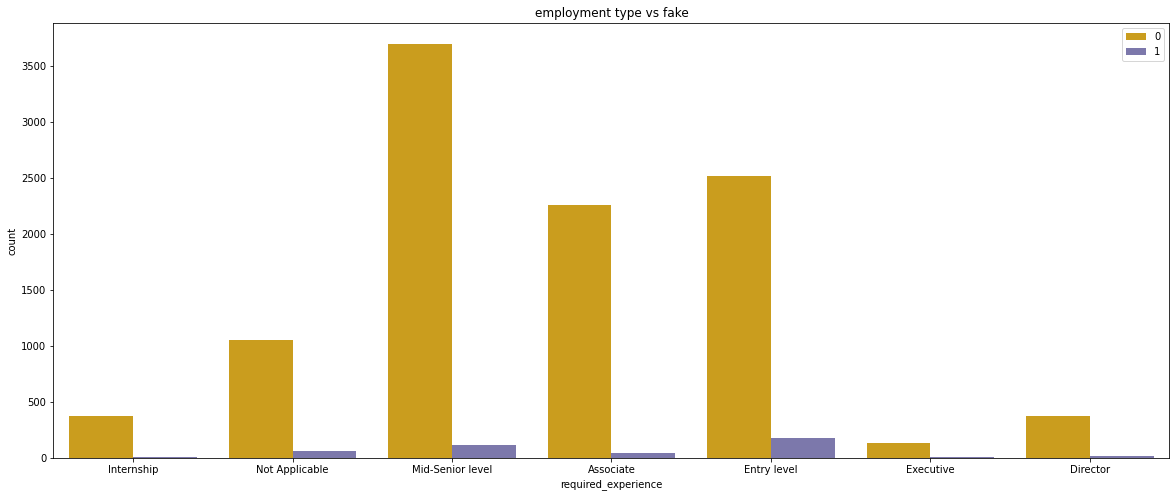

In [390]:
plt.figure(1,figsize=(20,8))
sns.countplot(hue=train_data.fraudulent,x=train_data.required_experience,palette='Dark2_r')
plt.legend(loc='upper right')
plt.title('employment type vs fake')

<ipython-input-391-0929718a46d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['text_length']=df2.description.apply(len)


Text(0.5, 0, 'Text Length')

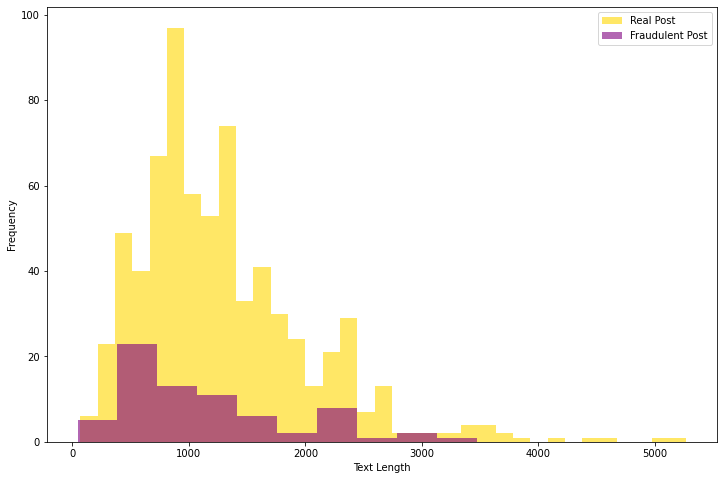

In [391]:
 #Show the length describtion in real and fake jobs
df2=train_data.dropna()
df2['text_length']=df2.description.apply(len)
plt.figure(figsize=(12, 8))

df2[df2.fraudulent==0].text_length.plot(bins=35, kind='hist', color='gold', label='Real Post', alpha=0.6)
df2[df2.fraudulent==1].text_length.plot(kind='hist', color='purple', label='Fraudulent Post', alpha=0.6)

plt.legend()
plt.xlabel("Text Length")

# Data Preprocess

In [397]:
#Drop Nan Values
df=df.dropna()

In [398]:
df.shape

(8383, 7)

In [91]:
## X is the feature of training data
X=df.drop('fraudulent',axis=1)

In [399]:
## y is the label of data
y=df['fraudulent']

In [400]:
y.value_counts()

0    8173
1     210
Name: fraudulent, dtype: int64

In [401]:
voc_size=5000

In [429]:
text = X.copy()

In [431]:
text

,title,description,requirements,company_profile,employment_type,required_experience
0,Marketing Intern,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,"We're Food52, and we've created a groundbreaki...",Other,Internship
1,Customer Service - Cloud Video Production,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,"90 Seconds, the worlds Cloud Video Production ...",Full-time,Not Applicable
3,Account Executive - Washington DC,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our passion for improving quality of life thro...,Full-time,Mid-Senior level
4,Bill Review Manager,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,SpotSource Solutions LLC is a Global Human Cap...,Full-time,Mid-Senior level
6,Head of Content (m/f),Your Responsibilities: Manage the English-spea...,Your Know-How: ...,"Founded in 2009, the Fonpit AG rose with its i...",Full-time,Mid-Senior level
...,...,...,...,...,...,...
17866,Post Production Editor,Key Duties:• Rough cut shows on Adobe Premier ...,"Additional Duties:• Ingest, log and label foot...","Stories by RELFrom 5,000 feet, we look like a ...",Full-time,Mid-Senior level
17870,Senior Financial Analyst (Retail),We are activity searching for a Senior Financi...,Must have a minimum of 3 + years in Financial ...,PROSULTING IS PEOPLE The ProSulting difference...,Full-time,Mid-Senior level
17875,Account Director - Distribution,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,Vend is looking for some awesome new talent to...,Full-time,Mid-Senior level
17876,Payroll Accountant,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,WebLinc is the e-commerce platform and service...,Full-time,Mid-Senior level


In [3]:
import nltk
import re
from nltk.corpus import stopwords

In [433]:
text['description'][0]

'Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff'

In [434]:
text.reset_index(inplace=True)

In [4]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [435]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(text)):
    results = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*', re.S)
    results_ = re.compile(r'[#URL]*_[a-zA-Z0-9.?/&=:]*', re.S)
    review = re.sub(results, '', text['description'][i])
    review = re.sub(results_, '', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Comparing Cleaned Data with Uncleaned Data

In [445]:
text['description'][200]

"As a\xa0full stack Scala developer\xa0at BizReach you will join an engineering-led division and the award-winning leader in recruiting service industry.\xa0We're looking for a results-driven Scala, or Java\xa0developer to help the new service develoepment.\xa0You will be working in a fast-paced environment on a service-based application. You will be responsible for implementing, monitoring, and optimizing the code that powers BizReach's data model, analytics, service APIs, and reducing technical debt along with improvements in the SDLC. As a developer in one of the fastest-growing businesses at BizReach our products are scaling rapidly and this is the team with the most to gain.#URL_ab2dc61618fbfab25be1758a9f0885fb6b2fc3d7e1d1b1fe2b6d4c809a4b8e5b##URL_60b218da63f65f8542ded47d51b5760e79031212de259e4dd559d49abb84aa28#"

In [447]:
corpus[200]

'full stack scala develop bizreach join engin led divis award win leader recruit servic industri look result driven scala java develop help new servic develoep work fast pace environ servic base applic respons implement monitor optim code power bizreach data model analyt servic api reduc technic debt along improv sdlc develop one fastest grow busi bizreach product scale rapidli team gain'

# One-Hot Embedding

(one_hot)This function receives as input a string of text and returns a list of encoded integers each corresponding to a word (or token) in the given input string.

In [459]:
onehot_code=[one_hot(words,voc_size)for words in corpus] 
onehot_code[1]

[3013,
 43,
 4844,
 4045,
 3845,
 3429,
 2716,
 3386,
 663,
 3691,
 410,
 3549,
 4185,
 4244,
 2903,
 735,
 1143,
 3155,
 239,
 4782,
 3499,
 1174,
 3616,
 3545,
 2716,
 4583,
 2445,
 2155,
 2371,
 3551,
 4167,
 3917,
 1829,
 3957,
 4240,
 3545,
 3529,
 3429,
 2716,
 434,
 2856,
 3327,
 240,
 1133,
 3040,
 4185,
 4185,
 4789,
 4378,
 3616,
 3040,
 4185,
 548,
 1399,
 4844,
 3545,
 4701,
 2555,
 3791,
 298,
 3658,
 2761,
 1429,
 1441,
 1542,
 2637,
 2516,
 4021,
 2834,
 4998,
 4575,
 4264,
 3327,
 1841,
 916,
 3341,
 4853,
 1858,
 2463,
 2076,
 2681,
 1652,
 2834,
 3327,
 2681,
 2064,
 2796,
 3957,
 1174,
 3616,
 3545,
 2716,
 2796,
 3957,
 1174,
 3616,
 3545,
 2716,
 1214,
 298,
 692,
 385,
 177,
 1703,
 245,
 3616,
 39,
 4291,
 310,
 634,
 3957,
 1380,
 1050,
 4185,
 150,
 1174,
 691,
 3860,
 2796,
 1458,
 2118,
 690,
 1934,
 1560,
 4805,
 2555,
 131,
 3616,
 3545,
 1397,
 4185,
 4372,
 4645,
 3616,
 3040,
 1037,
 245,
 578,
 1841,
 2375,
 470,
 3616,
 1205,
 3799,
 3693,
 3545,
 4789

Each number in the vector represents the corresponding word after one_hot encoding

Cut each sample length to ensure equal lengths

In [460]:
sent_length=100
one_hot_embedded_docs=pad_sequences(onehot_code,padding='pre',maxlen=sent_length)
print(one_hot_embedded_docs)

[[   0    0    0 ... 2968 1308 2810]
 [2796 3957 1174 ... 4126  553 2344]
 [2827 1275  945 ... 3303  293 4805]
 ...
 [2472 2993 4518 ... 3197 3429 3957]
 [1841 4747 1099 ... 1441 3549 3925]
 [4157 3415 2615 ... 2560 1123 4225]]


In [461]:
len(one_hot_embedded_docs[3])

100

In [462]:
len(one_hot_embedded_docs)

8383

# Build and Train the LSTM Model

In [335]:
## Building the model
embedding_vector_features= 400
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100))) ##Just add bidirectional!!, except it would just behave as normal LSTM Model
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 100, 400)          2000000   
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 200)               400800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 201       
Total params: 2,401,001
Trainable params: 2,401,001
Non-trainable params: 0
_________________________________________________________________
None


In [336]:
len(embedded_docs),y.shape

(8383, (8383,))

In [337]:
import numpy as np
X_final=np.array(one_hot_embedded_docs)
y_final=np.array(y)

In [338]:
class_weight = { 0:1,
                 1:5
}

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=32)

In [340]:
Ir_reduce=keras.callbacks.ReduceLROnPlateau('loss',patience=3,factor=0.5,min_lr=0.00000000001)

In [341]:
histroy = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,callbacks=[Ir_reduce])

Epoch 1/10
99/99 [==============================] - 32s 300ms/step - loss: 0.2607 - accuracy: 0.9434 - val_loss: 0.0891 - val_accuracy: 0.9781
Epoch 2/10
99/99 [==============================] - 27s 276ms/step - loss: 0.0752 - accuracy: 0.9783 - val_loss: 0.0572 - val_accuracy: 0.9890
Epoch 3/10
99/99 [==============================] - 28s 278ms/step - loss: 0.0215 - accuracy: 0.9946 - val_loss: 0.0557 - val_accuracy: 0.9909
Epoch 4/10
99/99 [==============================] - 29s 297ms/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 0.0595 - val_accuracy: 0.9900
Epoch 5/10
99/99 [==============================] - 32s 320ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0647 - val_accuracy: 0.9895
Epoch 6/10
99/99 [==============================] - 29s 294ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0688 - val_accuracy: 0.9890
Epoch 7/10
99/99 [==============================] - 28s 280ms/step - loss: 7.6287e-04 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.

In [357]:
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
labels = ["Real Job", "Fake Job"]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


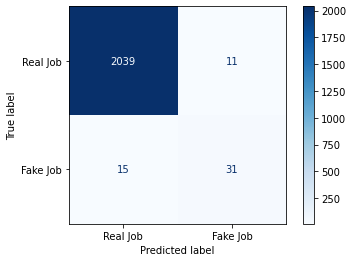

In [358]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


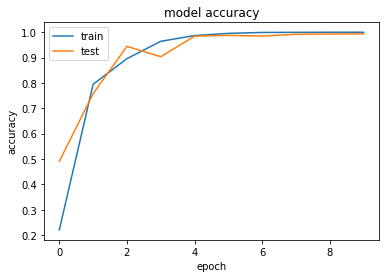

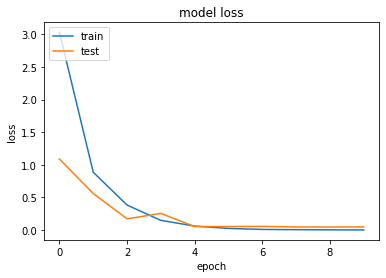

In [343]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Grid Search

This part took a long time

In [318]:
def create_model(embedding_vector_features, neurons):
    # create model
    model=Sequential()
    model.add(Embedding(5000,embedding_vector_features,input_length=sent_length)) # Embedded Layer
    model.add(Bidirectional(LSTM(neurons))) #LSTM Layer
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [319]:
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=0)
# define the grid search parameters
all_embedding_vector_features = [50,100,200,400]
neurons = [100, 150, 200]
param_grid = dict(neurons=neurons,embedding_vector_features = all_embedding_vector_features)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_final, y_final)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    


Best: 0.985924 using {'embedding_vector_features': 400, 'neurons': 100}
0.985566 (0.004095) with: {'embedding_vector_features': 50, 'neurons': 100}
0.984731 (0.003655) with: {'embedding_vector_features': 50, 'neurons': 150}
0.984373 (0.002156) with: {'embedding_vector_features': 50, 'neurons': 200}
0.984373 (0.002929) with: {'embedding_vector_features': 100, 'neurons': 100}
0.985805 (0.003654) with: {'embedding_vector_features': 100, 'neurons': 150}
0.985208 (0.003653) with: {'embedding_vector_features': 100, 'neurons': 200}
0.984134 (0.003259) with: {'embedding_vector_features': 200, 'neurons': 100}
0.984731 (0.003701) with: {'embedding_vector_features': 200, 'neurons': 150}
0.985566 (0.003259) with: {'embedding_vector_features': 200, 'neurons': 200}
0.985924 (0.003220) with: {'embedding_vector_features': 400, 'neurons': 100}
0.985208 (0.002271) with: {'embedding_vector_features': 400, 'neurons': 150}
0.985685 (0.003093) with: {'embedding_vector_features': 400, 'neurons': 200}
